# **ML Lab Week 10: SVM Classifier Lab**

**Objective:** The goal of this lab is to understand and implement Support Vector Machine (SVM) classifiers. You will train SVMs using three different kernels: **Linear, Radial Basis Function (RBF), and Polynomial**, on distinct datasets. You will then evaluate their performance using standard classification metrics and visualize their decision boundaries to see how they separate data.

## **Core Concepts**
**Support Vector Machine (SVM):** A powerful supervised learning algorithm that finds an optimal hyperplane to separate data points of different classes.

**Kernel Trick:** A technique that allows SVMs to solve non-linear problems by transforming data into a higher-dimensional space.

- Linear Kernel: Creates a straight-line decision boundary.

- RBF Kernel: Creates a complex, non-linear boundary, like a circle or a wave.

- Polynomial Kernel: Creates a curved, polynomial decision boundary.



---



## 1. Setup and Imports
First, let's import the necessary libraries.

In [4]:
# Cell 1: Imports and constants
SRN = "PES2UG23CS366"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# General plot style
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 12






---



## 2. Helper Function for Visualization
This helper function plots the decision boundaries for our trained models. It will work for all our datasets

In [5]:
def plot_decision_boundaries(X, y, model, title):
    """
    Visualizes the decision boundaries of a trained classifier.
    (Corrected version)
    """
    # Create a meshgrid to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

    # Get unique labels and ensure they are a list for the legend function
    unique_labels = np.unique(y)
    if len(unique_labels) == 2:
        legend_labels = ['Class 0', 'Class 1']
    else:
        legend_labels = list(unique_labels.astype(str))  # Convert numpy array to list

    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
    plt.show()




---



## 3. Experiments

# **PART 1**

## Dataset 1: The Moons Dataset
The Moons dataset is a synthetic dataset designed to test non-linear classification algorithms. The data points are shaped like two interlocking half-moons.

### Step 1.1: Generate and Prepare the Data
We will generate the data using scikit-learn and apply feature scaling.

In [6]:
# Cell 2: Create and split Moons dataset (2D naturally)
X_moons, y_moons = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42, stratify=y_moons)

scaler_moons = StandardScaler()
X_train_m_s = scaler_moons.fit_transform(X_train_m)
X_test_m_s = scaler_moons.transform(X_test_m)

print("Moons shapes:", X_train_m_s.shape, X_test_m_s.shape)


Moons shapes: (350, 2) (150, 2)


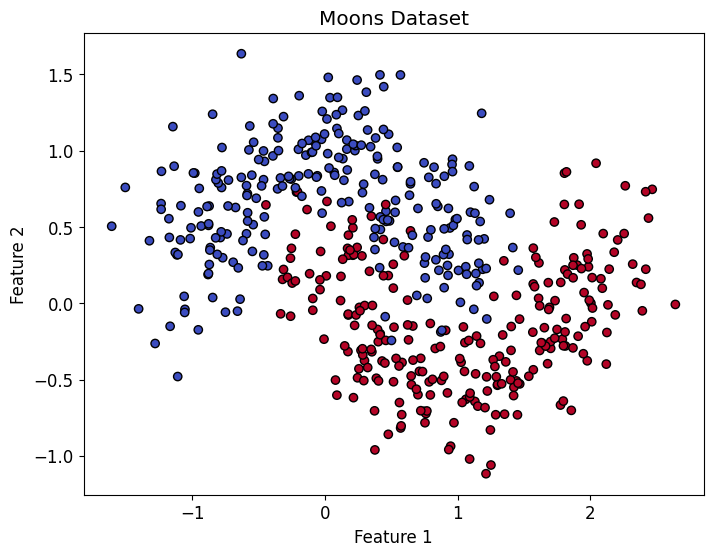

In [7]:
# Visualize the Moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()

### Step 1.2: Train and Evaluate SVM Kernels

=== Moons: Linear SVM ===
SRN: PES2UG23CS366
              precision    recall  f1-score   support

           0     0.8228    0.8667    0.8442        75
           1     0.8592    0.8133    0.8356        75

    accuracy                         0.8400       150
   macro avg     0.8410    0.8400    0.8399       150
weighted avg     0.8410    0.8400    0.8399       150

Accuracy: 0.84


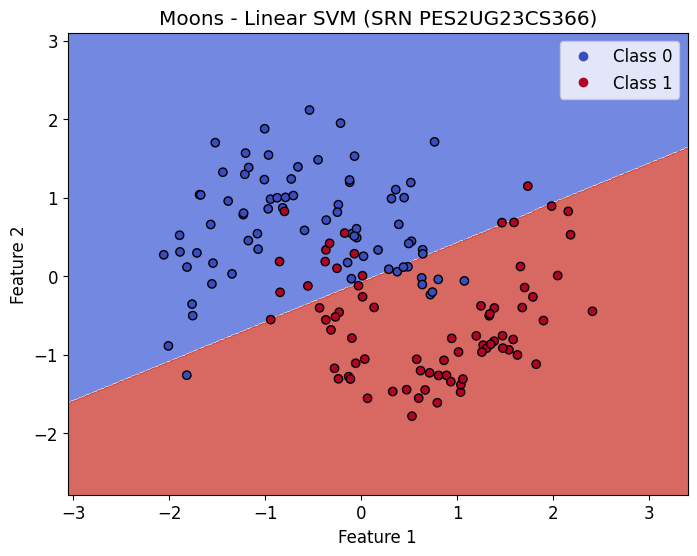

In [8]:
# Cell 3: Moons - Linear SVM
svc_linear_m = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_m.fit(X_train_m_s, y_train_m)
y_pred_m_linear = svc_linear_m.predict(X_test_m_s)

print("=== Moons: Linear SVM ===")
print(f"SRN: {SRN}")
print(classification_report(y_test_m, y_pred_m_linear, digits=4))
acc = accuracy_score(y_test_m, y_pred_m_linear)
print("Accuracy:", acc)

# plot decision boundary (use scaled features)
plot_decision_boundaries(X_test_m_s, y_test_m, svc_linear_m, title=f"Moons - Linear SVM (SRN {SRN})")


=== Moons: RBF SVM ===
SRN: PES2UG23CS366
              precision    recall  f1-score   support

           0     0.9241    0.9733    0.9481        75
           1     0.9718    0.9200    0.9452        75

    accuracy                         0.9467       150
   macro avg     0.9479    0.9467    0.9466       150
weighted avg     0.9479    0.9467    0.9466       150

Accuracy: 0.9466666666666667


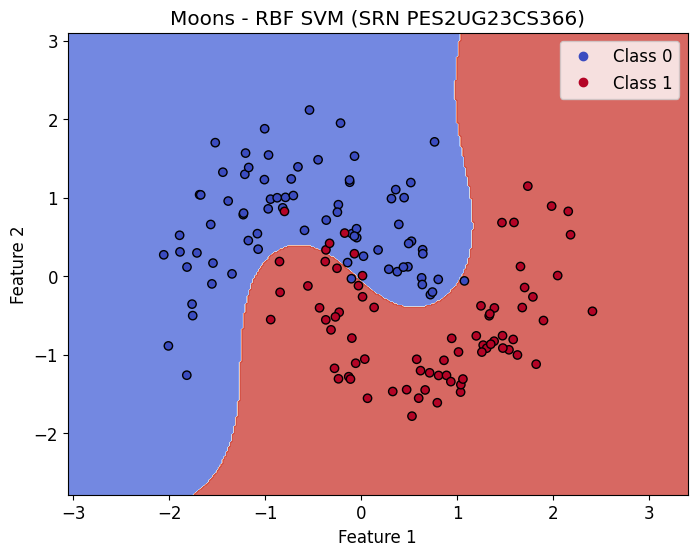

In [9]:
# Cell 4: Moons - RBF SVM
svc_rbf_m = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf_m.fit(X_train_m_s, y_train_m)
y_pred_m_rbf = svc_rbf_m.predict(X_test_m_s)

print("=== Moons: RBF SVM ===")
print(f"SRN: {SRN}")
print(classification_report(y_test_m, y_pred_m_rbf, digits=4))
print("Accuracy:", accuracy_score(y_test_m, y_pred_m_rbf))

# Plot the decision boundary (use scaled features)
plot_decision_boundaries(X_test_m_s, y_test_m, svc_rbf_m, title=f"Moons - RBF SVM (SRN {SRN})")


=== Moons: Poly SVM (MODIFIED: Degree 2, C=0.1) ===
SRN: PES2UG23CS366
              precision    recall  f1-score   support

           0     0.8442    0.8667    0.8553        75
           1     0.8630    0.8400    0.8514        75

    accuracy                         0.8533       150
   macro avg     0.8536    0.8533    0.8533       150
weighted avg     0.8536    0.8533    0.8533       150

Accuracy: 0.8533333333333334


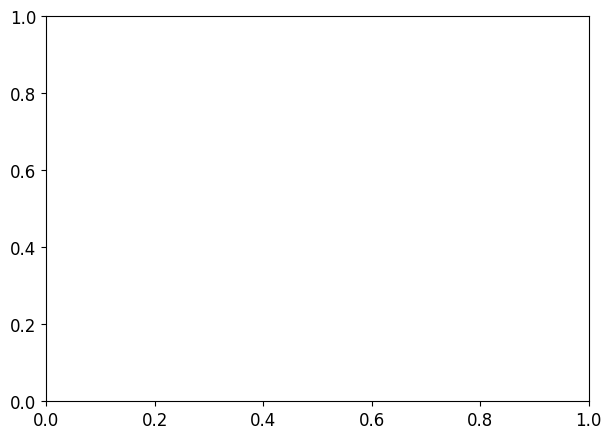

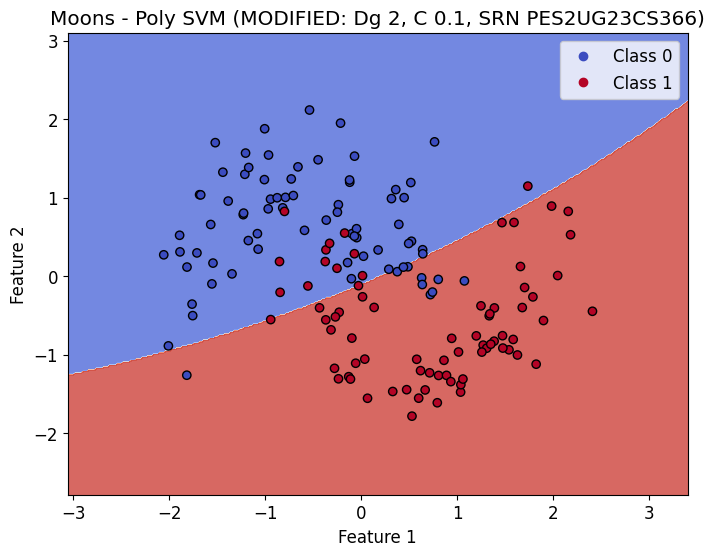

In [12]:
# Cell 5: Moons - Polynomial SVM (MODIFIED FOR COMPARISON: degree 2, C=0.1)
# Original: degree=3, C=1.0. This modification shows the effect of a simpler boundary and a softer margin.
svc_poly_m_mod = SVC(kernel='poly', degree=2, C=0.1, gamma='scale', coef0=1, random_state=42)
svc_poly_m_mod.fit(X_train_m_s, y_train_m)
y_pred_m_poly_mod = svc_poly_m_mod.predict(X_test_m_s)

print("=== Moons: Poly SVM (MODIFIED: Degree 2, C=0.1) ===")
print(f"SRN: {SRN}")
# Note: Since the model is simpler, performance will likely drop, making the boundary less 'perfect'
print(classification_report(y_test_m, y_pred_m_poly_mod, digits=4))
print("Accuracy:", accuracy_score(y_test_m, y_pred_m_poly_mod))

# The plot function is assumed to be defined elsewhere in the notebook
fig, ax = plt.subplots()
plot_decision_boundaries(X_test_m_s, y_test_m, svc_poly_m_mod, title=f"Moons - Poly SVM (MODIFIED: Dg 2, C 0.1, SRN {SRN})")

plt.show()


# svc_poly_m_complex = SVC(kernel='poly', degree=5, C=10.0, gamma='scale', coef0=1, random_state=42)

Moons - Soft (C=0.1) Accuracy: 0.8933333333333333
              precision    recall  f1-score   support

           0     0.8734    0.9200    0.8961        75
           1     0.9155    0.8667    0.8904        75

    accuracy                         0.8933       150
   macro avg     0.8945    0.8933    0.8933       150
weighted avg     0.8945    0.8933    0.8933       150

Moons - Hard (C=100) Accuracy: 0.94
              precision    recall  f1-score   support

           0     0.9342    0.9467    0.9404        75
           1     0.9459    0.9333    0.9396        75

    accuracy                         0.9400       150
   macro avg     0.9401    0.9400    0.9400       150
weighted avg     0.9401    0.9400    0.9400       150



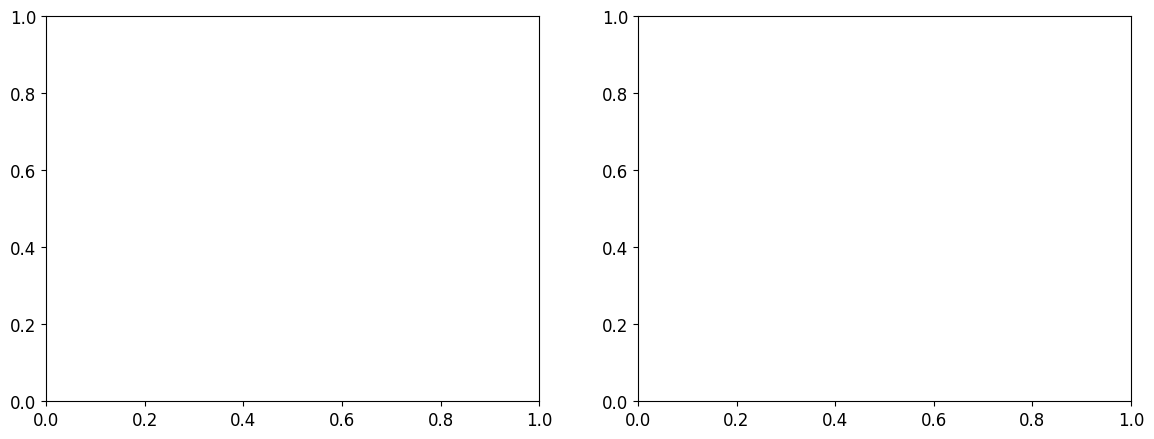

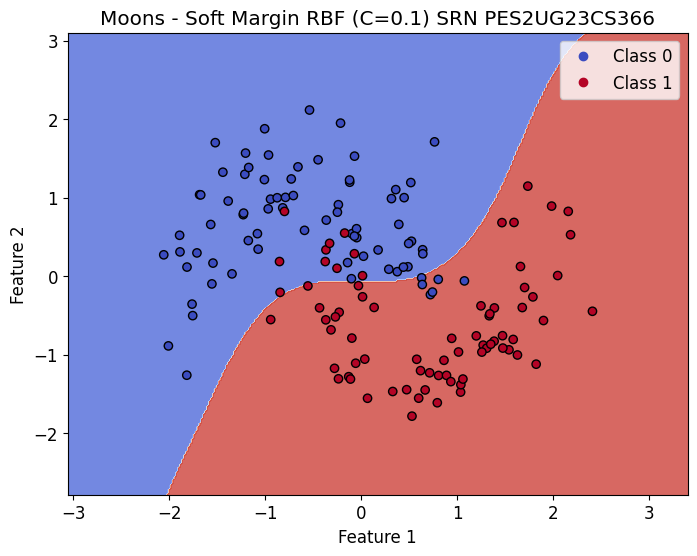

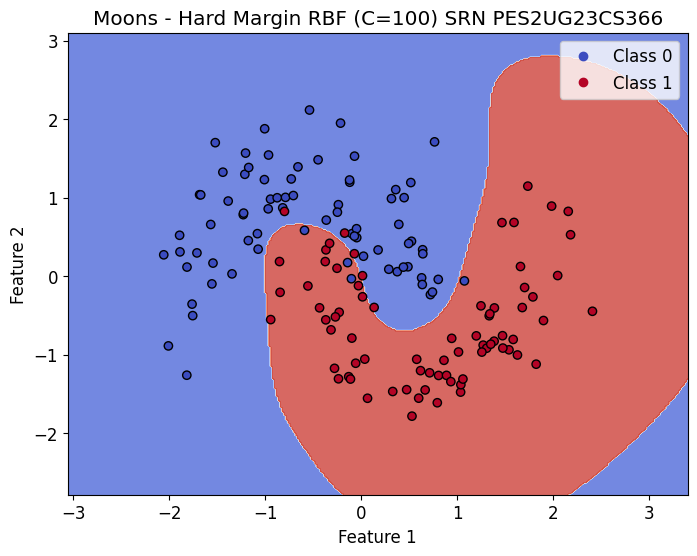

In [16]:
# Cell 6: Moons - Soft vs Hard margin comparison
svc_soft = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)   # softer margin
svc_hard = SVC(kernel='rbf', C=100.0, gamma='scale', random_state=42)  # harder margin

svc_soft.fit(X_train_m_s, y_train_m)
svc_hard.fit(X_train_m_s, y_train_m)

y_soft = svc_soft.predict(X_test_m_s)
y_hard = svc_hard.predict(X_test_m_s)

print("Moons - Soft (C=0.1) Accuracy:", accuracy_score(y_test_m, y_soft))
print(classification_report(y_test_m, y_soft, digits=4))
print("Moons - Hard (C=100) Accuracy:", accuracy_score(y_test_m, y_hard))
print(classification_report(y_test_m, y_hard, digits=4))

fig, axes = plt.subplots(1,2, figsize=(14,5))
plot_decision_boundaries(X_test_m_s, y_test_m, svc_soft, title=f"Moons - Soft Margin RBF (C=0.1) SRN {SRN}")
plot_decision_boundaries(X_test_m_s, y_test_m, svc_hard, title=f"Moons - Hard Margin RBF (C=100) SRN {SRN}")

plt.show()


### Analysis Questions for Moons:

1. Based on the metrics and the visualizations, what inferences about the performance of the Linear Kernel can you draw?


2. Compare the decision boundaries of the RBF and Polynomial kernels. Which one seems to capture the shape of the data more naturally?

# **PART 2**

## Dataset 2: Banknote Authentication
This is a real-world binary classification dataset where the goal is to predict whether a banknote is genuine or forged based on features extracted from a digital image.

### Step 2.1: Load and Prepare the Data
We will load this data from a public URL using pandas. We will use the variance and skewness of the image transform as our features for visualization.

In [ ]:
# Cell 7: Load Banknote Authentication dataset (4 features + PCA for plotting)
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# File path
file_path = "/content/data_banknote_authentication.txt"

# Load dataset
if not os.path.exists(file_path):
    raise FileNotFoundError(
        f"{file_path} not found. Please upload the .txt file to the notebook directory."
    )

df = pd.read_csv(file_path, header=None)
if df.shape[1] != 5:
    raise ValueError(f"Unexpected file shape {df.shape}. Expected 5 columns.")

df.columns = ['variance','skewness','curtosis','entropy','class']

# Features and labels
X_bank = df[['variance','skewness','curtosis','entropy']].values
y_bank = df['class'].values

# Train-test split on full 4 features (for metrics)
X_train_b_4d, X_test_b_4d, y_train_b, y_test_b = train_test_split(
    X_bank, y_bank, test_size=0.3, random_state=42, stratify=y_bank
)

# Scale 4D features
scaler_b_4d = StandardScaler()
X_train_b_4d_s = scaler_b_4d.fit_transform(X_train_b_4d)
X_test_b_4d_s = scaler_b_4d.transform(X_test_b_4d)

# PCA → 2D for decision boundary plotting
pca = PCA(n_components=2, random_state=42)
X_train_b_2d = pca.fit_transform(X_train_b_4d_s)
X_test_b_2d = pca.transform(X_test_b_4d_s)

print("4D Banknote shapes (scaled):", X_train_b_4d_s.shape, X_test_b_4d_s.shape)
print("2D PCA Banknote shapes (for plotting):", X_train_b_2d.shape, X_test_b_2d.shape)


4D Banknote shapes (scaled): (960, 4) (412, 4)
2D PCA Banknote shapes (for plotting): (960, 2) (412, 2)


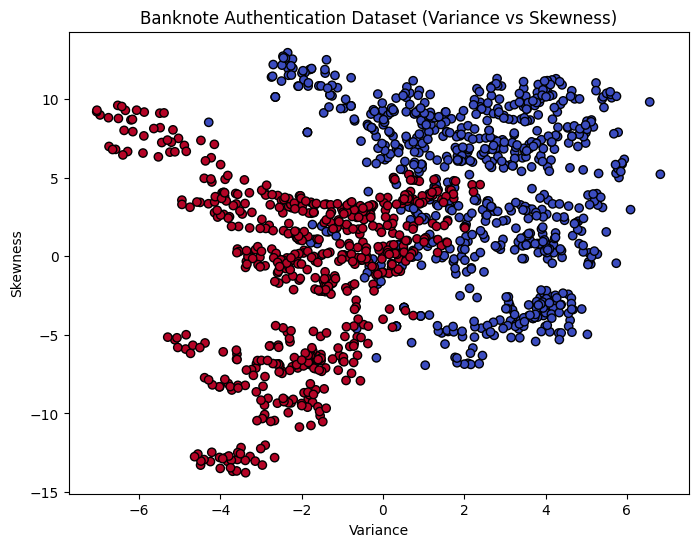

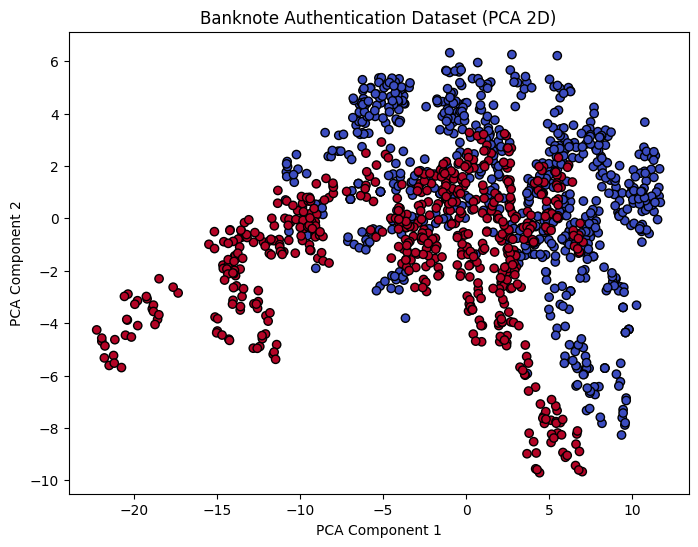

In [ ]:
# Cell: Visualize Banknote Authentication dataset
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1️ Scatter plot of first 2 original features
plt.figure(figsize=(8, 6))
plt.scatter(X_bank[:, 0], X_bank[:, 1], c=y_bank, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset (Variance vs Skewness)')
plt.show()

# 2️PCA 2D scatter (useful for SVM decision boundary visualization)
pca_vis = PCA(n_components=2, random_state=42)
X_bank_pca = pca_vis.fit_transform(X_bank)

plt.figure(figsize=(8, 6))
plt.scatter(X_bank_pca[:, 0], X_bank_pca[:, 1], c=y_bank, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Banknote Authentication Dataset (PCA 2D)')
plt.show()


### Step 2.2: Train and Evaluate SVM Kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title="Decision Boundary", ax=None, h=0.02):
    """
    Plot the decision boundary of a classifier on 2D data.
    X: 2D features (PCA)
    y: labels
    """
    if ax is None:
        ax = plt.gca()

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on meshgrid using the trained model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and points
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Classes")


SVM with LINEAR Kernel <PES2UG23CS366>
              precision    recall  f1-score   support

           0     1.0000    0.9651    0.9822       229
           1     0.9581    1.0000    0.9786       183

    accuracy                         0.9806       412
   macro avg     0.9791    0.9825    0.9804       412
weighted avg     0.9814    0.9806    0.9806       412

Accuracy: 0.9805825242718447
----------------------------------------


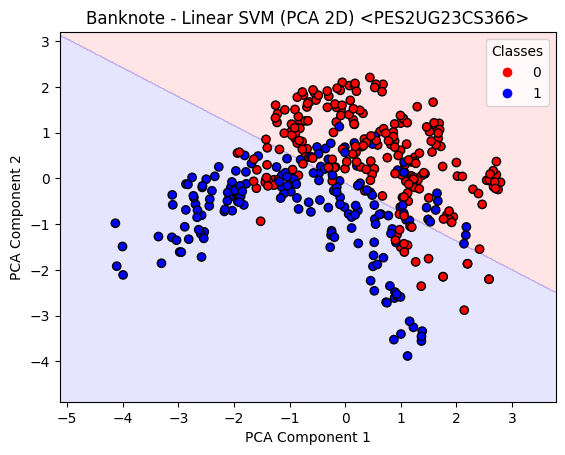

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# --- 4D Linear SVM for metrics ---
svc_linear_4d = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_4d.fit(X_train_b_4d_s, y_train_b)
y_pred_linear_4d = svc_linear_4d.predict(X_test_b_4d_s)

SRN = "PES2UG23CS366"  # replace with your actual SRN

print(f"SVM with LINEAR Kernel <{SRN}>")
print(classification_report(y_test_b, y_pred_linear_4d, digits=4))
print("Accuracy:", accuracy_score(y_test_b, y_pred_linear_4d))
print("-" * 40)

# --- 2D PCA Linear SVM for plotting ---
svc_linear_2d = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear_2d.fit(X_train_b_2d, y_train_b)

fig, ax = plt.subplots()
plot_decision_boundary(svc_linear_2d, X_test_b_2d, y_test_b,
                       title=f"Banknote - Linear SVM (PCA 2D) <{SRN}>", ax=ax)
plt.show()


SVM with RBF Kernel <PES2UG23CS366>
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       229
           1     1.0000    1.0000    1.0000       183

    accuracy                         1.0000       412
   macro avg     1.0000    1.0000    1.0000       412
weighted avg     1.0000    1.0000    1.0000       412

Accuracy: 1.0
----------------------------------------


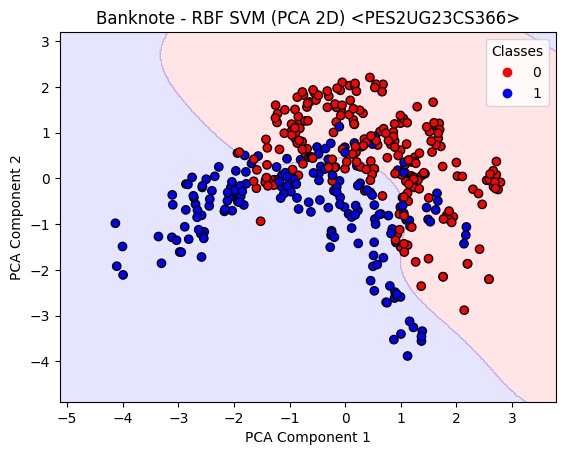

In [ ]:
# --- 4D RBF SVM for metrics ---
svc_rbf_4d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf_4d.fit(X_train_b_4d_s, y_train_b)
y_pred_rbf_4d = svc_rbf_4d.predict(X_test_b_4d_s)

print(f"SVM with RBF Kernel <{SRN}>")
print(classification_report(y_test_b, y_pred_rbf_4d, digits=4))
print("Accuracy:", accuracy_score(y_test_b, y_pred_rbf_4d))
print("-" * 40)

# --- 2D PCA RBF SVM for plotting ---
svc_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf_2d.fit(X_train_b_2d, y_train_b)

fig, ax = plt.subplots()
plot_decision_boundary(svc_rbf_2d, X_test_b_2d, y_test_b,
                       title=f"Banknote - RBF SVM (PCA 2D) <{SRN}>", ax=ax)
plt.show()


SVM with POLY Kernel <PES2UG23CS366>
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       229
           1     1.0000    1.0000    1.0000       183

    accuracy                         1.0000       412
   macro avg     1.0000    1.0000    1.0000       412
weighted avg     1.0000    1.0000    1.0000       412

Accuracy: 1.0
----------------------------------------


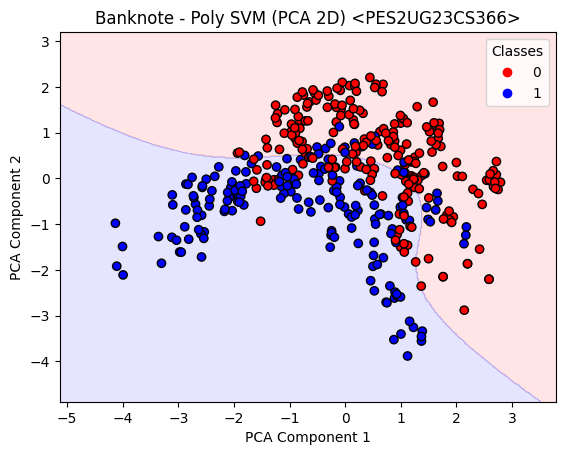

In [ ]:
# --- 4D Polynomial SVM for metrics ---
svc_poly_4d = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, random_state=42)
svc_poly_4d.fit(X_train_b_4d_s, y_train_b)
y_pred_poly_4d = svc_poly_4d.predict(X_test_b_4d_s)

print(f"SVM with POLY Kernel <{SRN}>")
print(classification_report(y_test_b, y_pred_poly_4d, digits=4))
print("Accuracy:", accuracy_score(y_test_b, y_pred_poly_4d))
print("-" * 40)

# --- 2D PCA Polynomial SVM for plotting ---
svc_poly_2d = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, random_state=42)
svc_poly_2d.fit(X_train_b_2d, y_train_b)

fig, ax = plt.subplots()
plot_decision_boundary(svc_poly_2d, X_test_b_2d, y_test_b,
                       title=f"Banknote - Poly SVM (PCA 2D) <{SRN}>", ax=ax)
plt.show()


### Step 2.3: Visualize Decision Boundaries

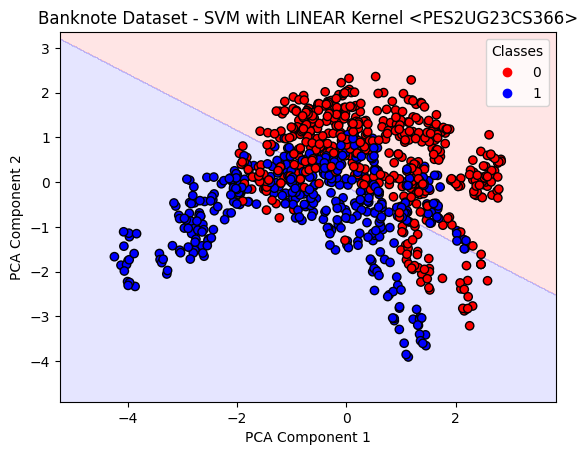

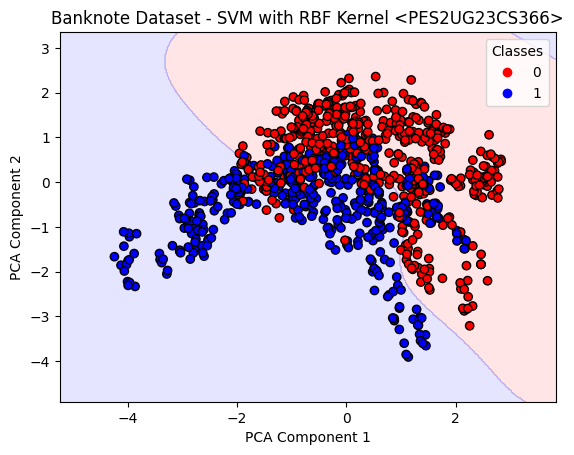

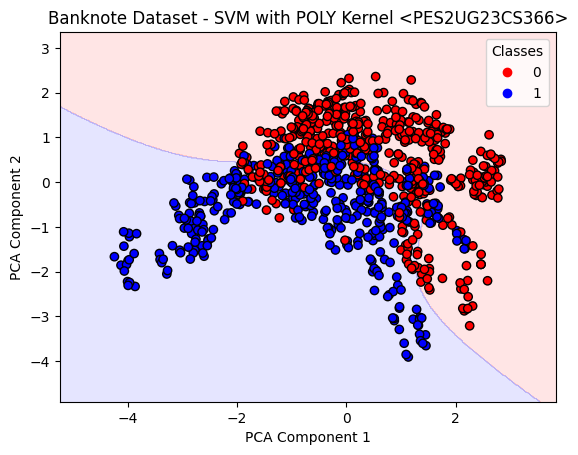

In [ ]:
# Train 2D PCA models specifically for plotting
models_banknote_2d = {}

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, random_state=42)
    else:
        model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)

    model.fit(X_train_b_2d, y_train_b)   # Train on PCA 2D features
    models_banknote_2d[kernel] = model

# Plot decision boundaries
SRN = "PES2UG23CS366"

for kernel, model in models_banknote_2d.items():
    fig, ax = plt.subplots()
    plot_decision_boundary(
        model,
        X_train_b_2d,    # PCA 2D features
        y_train_b,
        title=f'Banknote Dataset - SVM with {kernel.upper()} Kernel <{SRN}>',
        ax=ax
    )
    plt.show()


### Analysis Questions for Banknote:
1. In this case, which kernel appears to be the most effective?
2. The Polynomial kernel shows lower performance here compared to the Moons dataset. What might be the reason for this?

---

# **PART 3**

## 4. Understanding the Hard and Soft Margins
Soft Margin (Small C value, e.g., 0.1): A smaller C value creates a "softer" margin, meaning the model is more tolerant of misclassifications. This results in a wider margin and can lead to better generalization, especially with noisy data.

Hard Margin (Large C value, e.g., 100): A larger C value creates a "harder" margin. The model will try to classify every data point correctly, resulting in a narrower margin. This can lead to overfitting if the data has outliers.

Let's create a dataset that is mostly linearly separable but has some noise, which is perfect for understanding the difference between hard and soft margins.

SVM with SOFT RBF Kernel (C=0.1) <PES2UG23CS366>
              precision    recall  f1-score   support

           0     1.0000    0.9782    0.9890       229
           1     0.9734    1.0000    0.9865       183

    accuracy                         0.9879       412
   macro avg     0.9867    0.9891    0.9877       412
weighted avg     0.9882    0.9879    0.9879       412

Accuracy: 0.9878640776699029
----------------------------------------
SVM with HARD RBF Kernel (C=100) <PES2UG23CS366>
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       229
           1     1.0000    1.0000    1.0000       183

    accuracy                         1.0000       412
   macro avg     1.0000    1.0000    1.0000       412
weighted avg     1.0000    1.0000    1.0000       412

Accuracy: 1.0
----------------------------------------


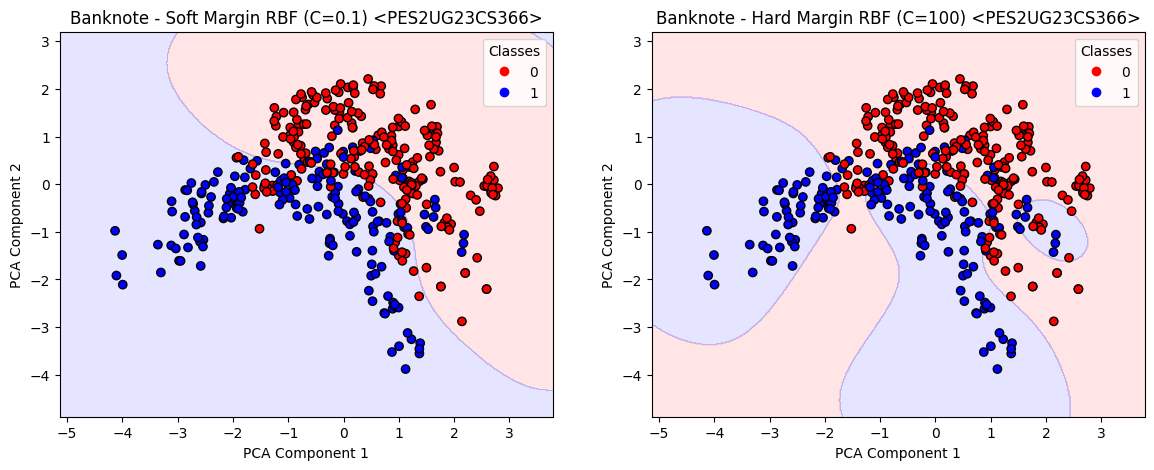

In [ ]:
# --- 4D Soft and Hard RBF SVMs ---
svc_soft_4d = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)
svc_hard_4d = SVC(kernel='rbf', C=100.0, gamma='scale', random_state=42)

svc_soft_4d.fit(X_train_b_4d_s, y_train_b)
svc_hard_4d.fit(X_train_b_4d_s, y_train_b)

y_soft_4d = svc_soft_4d.predict(X_test_b_4d_s)
y_hard_4d = svc_hard_4d.predict(X_test_b_4d_s)

print(f"SVM with SOFT RBF Kernel (C=0.1) <{SRN}>")
print(classification_report(y_test_b, y_soft_4d, digits=4))
print("Accuracy:", accuracy_score(y_test_b, y_soft_4d))
print("-" * 40)

print(f"SVM with HARD RBF Kernel (C=100) <{SRN}>")
print(classification_report(y_test_b, y_hard_4d, digits=4))
print("Accuracy:", accuracy_score(y_test_b, y_hard_4d))
print("-" * 40)

# --- 2D PCA Soft/Hard RBF for plotting ---
svc_soft_2d = SVC(kernel='rbf', C=0.1, gamma='scale', random_state=42)
svc_hard_2d = SVC(kernel='rbf', C=100.0, gamma='scale', random_state=42)

svc_soft_2d.fit(X_train_b_2d, y_train_b)
svc_hard_2d.fit(X_train_b_2d, y_train_b)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
plot_decision_boundary(svc_soft_2d, X_test_b_2d, y_test_b,
                       title=f"Banknote - Soft Margin RBF (C=0.1) <{SRN}>", ax=axes[0])
plot_decision_boundary(svc_hard_2d, X_test_b_2d, y_test_b,
                       title=f"Banknote - Hard Margin RBF (C=100) <{SRN}>", ax=axes[1])
plt.show()


Now, let's train two SVM models with a linear kernel: one with a small C (soft margin) and one with a large C (hard margin).

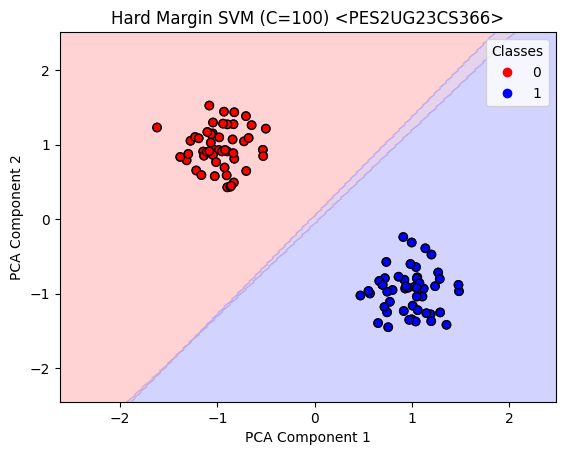

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# -----------------------------
# Example: create a 2D dataset
# -----------------------------
X_linear, y_linear = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_linear)
y_train_linear = y_linear

# -----------------------------
# Soft Margin SVM (C=0.1)
# -----------------------------
SRN = "PES2UG23CS366"
svm_soft = SVC(kernel='linear', C=0.1, random_state=42)
svm_soft.fit(X_train_linear_scaled, y_train_linear)

# Plot decision boundary
plot_decision_boundary(svm_soft, X_train_linear_scaled, y_train_linear,
                       title=f'Soft Margin SVM (C=0.1) <{SRN}>')

# -----------------------------
# Hard Margin SVM (C=100)
# -----------------------------
svm_hard = SVC(kernel='linear', C=100.0, random_state=42)
svm_hard.fit(X_train_linear_scaled, y_train_linear)

# Plot decision boundary
plot_decision_boundary(svm_hard, X_train_linear_scaled, y_train_linear,
                       title=f'Hard Margin SVM (C=100) <{SRN}>')


### Analysis Questions

1. Compare the two plots. Which model, the "Soft Margin" (C=0.1) or the "Hard Margin" (C=100), produces a wider margin?

2. Look closely at the "Soft Margin" (C=0.1) plot. You'll notice some points are either inside the margin or on the wrong side of the decision boundary. Why does the SVM allow these "mistakes"? What is the primary goal of this model?

3. Which of these two models do you think is more likely to be overfitting to the training data? Explain your reasoning.

4. Imagine you receive a new, unseen data point. Which model do you trust more to classify it correctly? Why? In a real-world scenario where data is often noisy, which value of C (low or high) would you generally prefer to start with?

---

## 5. Lab Summary and Conclusion
In this lab, you have:

- Trained SVM classifiers on three distinct datasets: one synthetic non-linear, one real-world binary, and one high-dimensional multi-class.

- Implemented and compared three common kernels: Linear, RBF, and Polynomial.

- Evaluated model performance using standard classification reports.

- Visualized decision boundaries to understand how each kernel operates on different data distributions.

- Understood hard and soft margins.



---

